In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train , y_train),(X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

50000 - Training Örneği <br>
32x32 - Görsel Boyutları <br>
3 - RGB

In [3]:
X_test.shape

(10000, 32, 32, 3)

10000 - Test Örneği <br>
32x32 - Görsel Boyutları <br>
3 - RGB

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[0]

'airplane'

In [8]:
def gorsel_goster(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

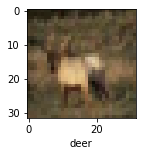

In [9]:
gorsel_goster(X_train, y_train, 3)

RGB kanalı 3 bölümden oluşur. R(kırmızı), G(yeşil) ve B(mavi).<br>
Bu üç ayrı kanalın her biri 0 ile 255 arası bir değer alabilir ve böylece <br>
renkler oluşturulur.<br>
Verisetimizdeki her bir gorselin değerlerini 255'e bölersek, 0 ile 1<br> arasında normalizasyon yapmış oluruz.

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),  
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history1 = cnn.fit(X_train, y_train, epochs=100, steps_per_epoch = 50, batch_size = 3)

Epoch 1/100
50/50 [==============================] - 0s 3ms/step - loss: 1.4406 - accuracy: 0.4867
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 1.4215 - accuracy: 0.4800
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 1.3824 - accuracy: 0.4733
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 1.3392 - accuracy: 0.4667
Epoch 5/100
50/50 [==============================] - ETA: 0s - loss: 1.3587 - accuracy: 0.46 - 0s 4ms/step - loss: 1.3217 - accuracy: 0.4867
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 1.3229 - accuracy: 0.5333
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 1.3189 - accuracy: 0.6200
Epoch 8/100
50/50 [==============================] - 0s 4ms/step - loss: 1.5880 - accuracy: 0.4467
Epoch 9/100
50/50 [==============================] - 0s 4ms/step - loss: 1.2406 - accuracy: 0.5467
Epoch 10/100
50/50 [==============================] - 0s 4ms/step -

In [14]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4421 - accuracy: 0.4910


[1.4420700073242188, 0.4909999966621399]

In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.7722847e-03, 9.1130816e-04, 8.6289629e-02, 4.5914552e-01,
        1.0434080e-01, 2.6656434e-01, 5.6806419e-02, 1.1073265e-02,
        4.7843894e-03, 1.3119834e-03],
       [1.4496610e-01, 1.5510891e-01, 6.3135359e-04, 1.6547216e-04,
        6.9622634e-05, 1.2235076e-05, 3.3398617e-05, 3.8381149e-06,
        6.4120245e-01, 5.7806596e-02],
       [2.6985297e-01, 8.4360853e-02, 4.4607587e-02, 8.9490719e-02,
        1.6844239e-02, 2.5212910e-02, 6.0294289e-03, 5.9630722e-03,
        3.8349441e-01, 7.4143738e-02],
       [4.8296180e-01, 1.4993618e-02, 4.1721411e-02, 8.4517412e-03,
        2.1375585e-02, 1.5486666e-03, 1.4024152e-03, 3.8937782e-03,
        4.0496653e-01, 1.8684402e-02],
       [5.1076603e-03, 2.5342365e-03, 1.2273740e-01, 2.3401138e-01,
        2.1049251e-01, 1.9017768e-01, 1.7104021e-01, 5.4658644e-02,
        3.8776405e-03, 5.3626406e-03]], dtype=float32)

In [16]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:5]

[3, 8, 8, 0, 3]

In [17]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [27]:
from sklearn.metrics import classification_report
print("Sınıflandırma Sonucu : \n" , classification_report(y_test , y_classes))

Sınıflandırma Sonucu : 
               precision    recall  f1-score   support

           0       0.56      0.58      0.57      1000
           1       0.70      0.64      0.67      1000
           2       0.36      0.16      0.22      1000
           3       0.30      0.39      0.34      1000
           4       0.34      0.50      0.40      1000
           5       0.41      0.41      0.41      1000
           6       0.49      0.58      0.53      1000
           7       0.59      0.56      0.57      1000
           8       0.65      0.61      0.63      1000
           9       0.64      0.48      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



<Figure size 432x288 with 0 Axes>

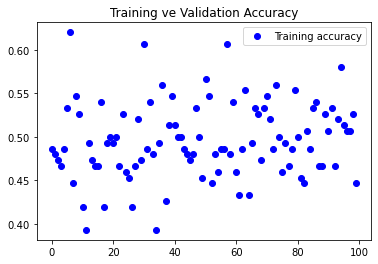

<Figure size 432x288 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.title('Training ve Validation Accuracy')
plt.legend()
plt.figure()